<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> KMeans </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

**Students**
* Conet Brieuc(11181800)
* Deside Guillaume (39731800)
* Loffet Alexandre (54701700)

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **November 4th**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Project Purpose </font> <br> <br>

<div style="text-align: justify"> In this challenge, you are asked to cluster blood cells on a micrograph image as shown in the figure below. Clustering refers to a set of unsupervised methods (i.e., data without defined categories or clusters) allowing to group objects (here pixels) in such a way that more similar pixels are grouped together.

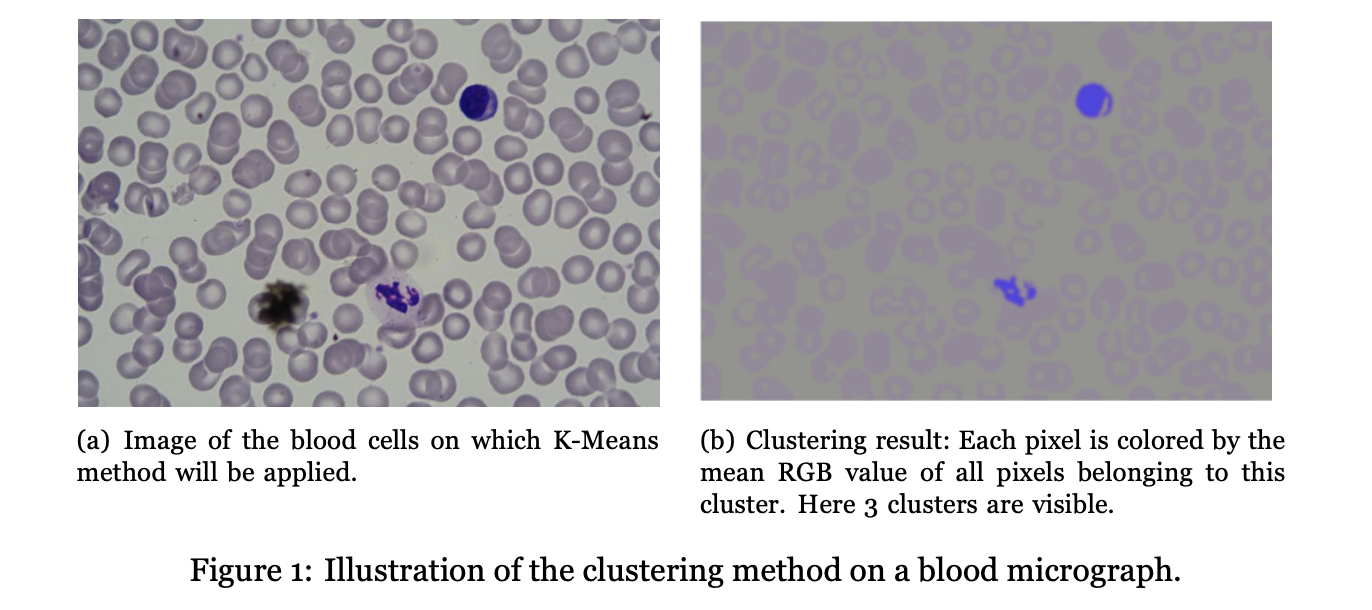

<font size=6 color=#009999> 3. K-Means algorithm </font> <br> <br>

<font size=4 color=#009999> 3.1 Clustering Formation </font> <br> <br>
<div style="text-align: justify"> Clustering can be defined as the task of grouping a set of objects in such a way 
that objects in the same group (called cluster) are more similar(in some sense or another) to each other than to 
those in other groups (clusters) [1]. In other words, this corresponds to finding, among all $K$-partitions $C_{1}$ <span>&#8746;</span> $C_{2}$ <span>&#8746;</span> ... <span>&#8746;</span> $C_{K}$, the one that minimizes the Sum of the Squared Errors (SSE):

$$ min_{ C_{1} \cup C_{2} \cup ... \cup C_{3} } = \sum_{i=1}\sum_{x  \in  C_{i}} dist(c_{i},x)^{2} $$
 
where $c_{i}$ denotes the mean of each cluster $C_{k}$ (=centroids) [2].


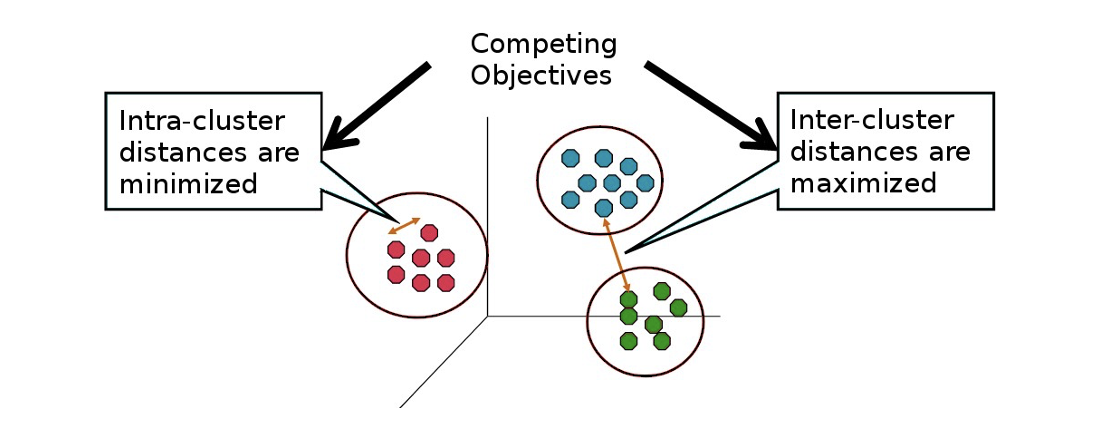

<font size=4 color=#009999> 3.2 Pseudo-code </font> <br> <br>
<div style="text-align: justify"> As previously mentioned, the goal of the method is to find $K$ centroids as much as possible far away from each other and assign each object to the nearest centroid. For this purpose, the algorithm iterates between two steps until a stopping criteria is reached (i.e., data points are assigned to the same cluster, maximum number of iterations,...):<br>
1.	Data assignment step: Each data point is assigned to its nearest centroid, (usually) based on the squared Eu- clidean distance.<br>
2.	Centroid update step: Centroids are recomputed by taking the mean of all data points assigned to that centroid’s cluster.<br><br>
This process is depicted by the following pseudo-code:


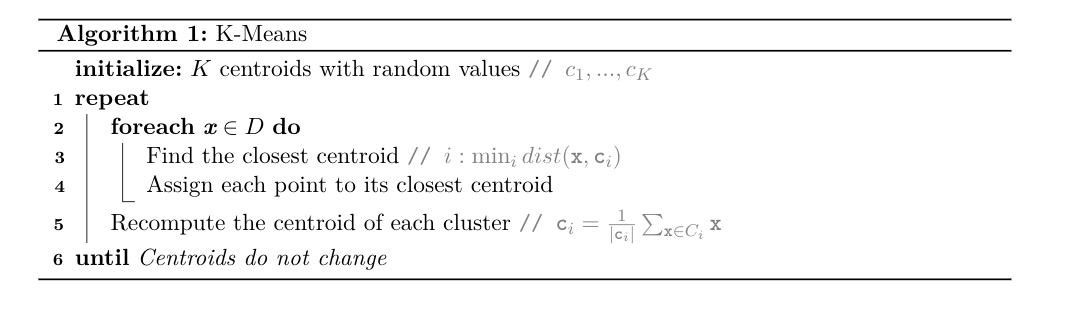

<div style="text-align: justify"> K-Means algorithm is guaranteed to converge to a result. However, the result may be
a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the
algorithm with randomized starting centroids may give a better outcome.

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
K is a crucial parameter of the method. Can you find an optimal value of this parameter that gives best results?

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore")
""" -----------------------------------------------------------------------------------------
K-Means clustering method
INPUT : 
    - im: image to cluster
    - K : number of clusters
    - nb_epochs : number of epochs
OUTPUT :
    - RGB image with mean rgb value of corresponding centroid
----------------------------------------------------------------------------------------- """ 

def KMeans(im, K, nb_epochs, with_xy=False):
    print("start Kmeans")
    img_array = np.asarray(im)
    img_array_scale = img_array / 255 #normalized RGB values
    #create clusters and centroids
    clusters = np.random.random_integers(0, K - 1, size=(img_array.shape[0], img_array.shape[1]))
    centroids = np.random.random_integers(0, 255, size=(K, 3))/255

    width_x = img_array.shape[0]
    width_y = img_array.shape[1]
    if with_xy: #change centroids if with_xy
        centroids_xy = np.random.rand(K, 2)
        centroids = np.concatenate((centroids, centroids_xy), axis=1)

    for i in range(nb_epochs): # max nb_epochs iteration
        for j in range(width_x): 
            for z in range(width_y):
                best_distance = 10e10
                for cluster_index, cluster_centroid in enumerate(centroids):  # which is the best cluster for this point
                    if with_xy:
                        rgb_xy = np.concatenate((img_array_scale[j, z], np.array([j/width_x, z/width_y])), axis=None)
                        new_dist = euclidean_distances(np.reshape(rgb_xy, (1, -1)),
                                                       np.reshape(cluster_centroid, (1, -1)))
                    else:
                        new_dist = euclidean_distances(np.reshape(img_array_scale[j, z], (1, -1)),
                                                       np.reshape(cluster_centroid, (1, -1)))

                    if new_dist < best_distance:
                        best_distance = new_dist
                        clusters[j, z] = cluster_index

        for k in range(K): # centroids = mean in cluster
            k_indexes = np.where(clusters == k)
            if len(k_indexes[0]) > 0:
                sum_r = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 0].sum() #R mean in cluster
                sum_g = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 1].sum() #G mean in cluster
                sum_b = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 2].sum() #B mean in cluster
                if with_xy:
                    new_x = (1 / len(k_indexes[0])) * k_indexes[0].sum()*(1/width_x)
                    new_y = (1 / len(k_indexes[0])) * k_indexes[1].sum()*(1/width_y)
                    centroids[k] = np.array([sum_r, sum_g, sum_b, new_x, new_y])
                else:
                    centroids[k] = np.array([sum_r, sum_g, sum_b])
            else: # if no pixel in the cluster
                new_centroids = np.random.random_integers(0, 255, size=(1, 3))/255
                if with_xy :
                    centroids_xy = np.random.rand(1, 2)
                    centroids[k] = np.concatenate((new_centroids, centroids_xy), axis=1)
                else :
                    centroids[k] = new_centroids

    """sum = 0
    for k in range(K):
        k_indexes = np.where(clusters == k)
        if len(k_indexes[0]) > 0:
            for i in range(len(k_indexes)):
                sum += euclidean_distances(np.reshape(img_array_scale[k_indexes[0][i], k_indexes[1][i]], (1, -1)),
                                           np.reshape(centroids[k], (1, -1)))
                                           
    print(sum,K)"""
    #the above part allows to calculate the sum to compare the differents solutions
    #create new image with centroids'value for each pixel in the clusters
    new_img = np.zeros(img_array.shape)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            new_img[i, j] = np.array([centroids[clusters[i, j]][0], centroids[clusters[i, j]][1],
                                      centroids[clusters[i, j]][2]])*255
    new_img = new_img.astype(np.uint8)
    
    #return sum,new_img
    return new_img

In [3]:
img = Image.open("imgs/blood.jpg")

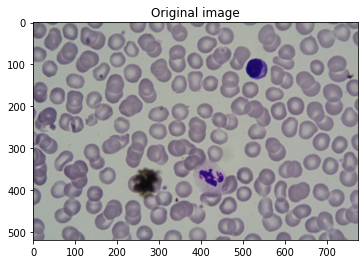

In [4]:
plt.figure()
plt.title("Original image")
plt.imshow(np.asarray(img))
plt.show()

In [3]:
optimization_lst = []
#version that returns sum and new_image used here
for k in range(3, 6):
    r = KMeans(img, k, 5, False)
    optimization_lst.append((k,r[0]))

optimization_lst.sort(key=lambda y: y[1])

print("Optimization list:", optimization_lst)

start Kmeans
[[0.71248253]] 3
start Kmeans
[[0.76060067]] 4
start Kmeans
[[0.73675249]] 5
Optimization list: [(3, array([[0.71248253]])), (5, array([[0.73675249]])), (4, array([[0.76060067]]))]


start Kmeans


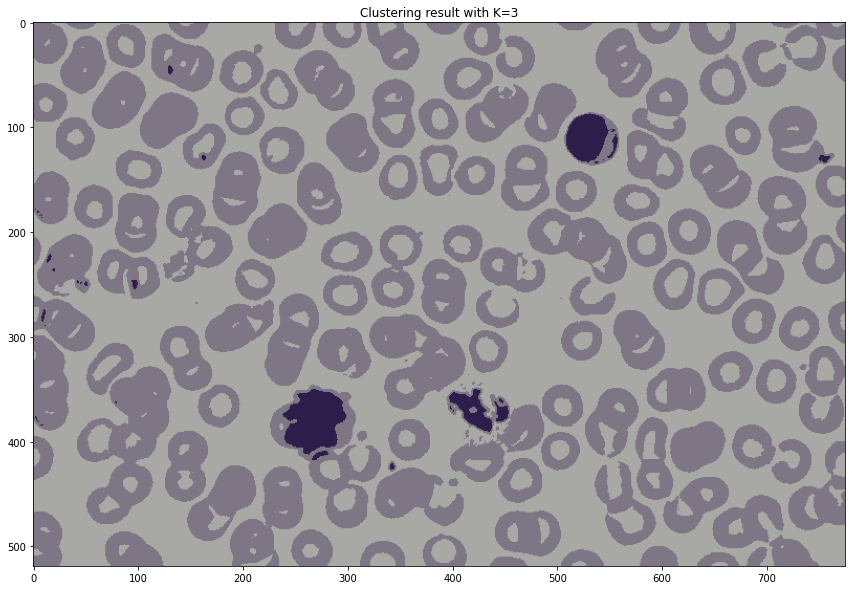

In [7]:
plt.figure(figsize=(16,10))
plt.title("Clustering result with K=3")
plt.imshow(KMeans(img,3,5,False))
plt.show()

To find the best K, we calculate the sum of euclidian distance of each pixels with the centroid of its cluster. Best K in our case, it's 3 (see list above). When we look at the image, it seems to fit. We have a color for the background, a color for the cells, and a color for the color spots.

Values can change from one iteration to the next.

$ ⚠ $ One of the drawbacks of Kmeans is it can get stuck in a local minimum. We find many clusters in this image, where k-means failed to find the correct structure. So we need a lot of iterations to have a lucky pick but it takes a lof of time in case of our own implementation.

Another disadvantage is the Algorithm's complexity. We have a complexity of $\mathcal{O}(k^{2}n^{2}) $ (we assume that nb_epochs $ \approx $ k and we assume that the image is NxN). The fact to increase k can increase time of the algorithm.

It is critical to discover a strategy to offer effective clustering in each case without increasing the complexity.

<font size=4 color=#009999> 3.3 Feature Space </font> <br> <br>
<div style="text-align: justify"> K-Means algorithm requires a proper choice of the feature space in which the 
clustering will be performed. Generally, the RGB (Red Green Blue) space id the most used for pixel clustering. 
In this RGB space, each pixel lies on 3-dimensional space where each axis in one of the component of the pixel color 
in the RGB space. A clustering example in RGB space is represented below [3].

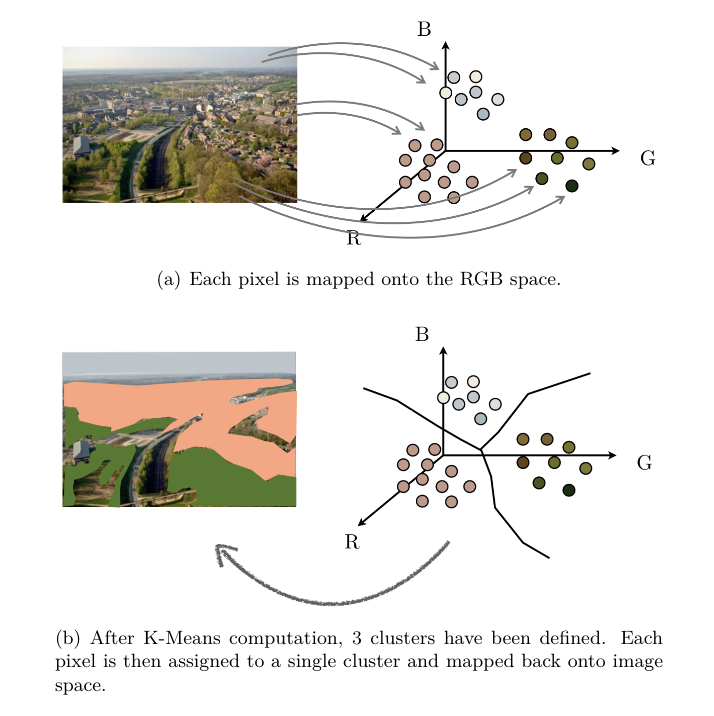

<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Other features spaces can be used in order to perform the clustering. For example, RGB + x and y coordinates of pixel
in the image space can be used. Do you observe any improvement by adding pixel location? Do you have any idea of 
other features that can be used?

start Kmeans


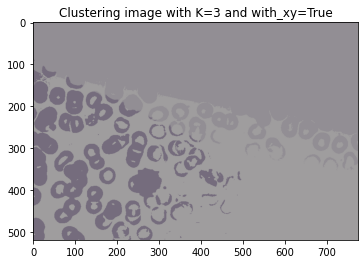

In [11]:
plt.figure()
plt.title("Clustering image with K=3 and with_xy=True")
plt.imshow(KMeans(img,3,1,True))
plt.show()

The addition of x and y to locate clusters in a picture has a significant influence. In our example, we can observe that we lost a big part of the information. Just after 1 iteration, we lost information as shown in the above example.
We can reduce the amount of lost information by increasing the number of clusters/centroids, however, this increases the complexity of our Kmeans as explained above. The best K would be 8.
In our Kmeans, it's important to see that we normalize the RGB and coordinate values between 0 and 1 to provide equal relevance to parameters in the euclidian distance.

<div class="alert alert-info">
<b>QUESTION 3</b>  <br> The result of K-Means depends on the centroids initialization. Can you find a better way to assign those
values?

In [5]:
def KMeans_centroids(im, K, nb_epochs, centroids):
    print("start")
    img_array = np.asarray(im)
    img_array_scale = img_array / 255
    clusters = np.random.random_integers(0, K - 1, size=(img_array.shape[0], img_array.shape[1]))
    centroids = centroids/255
    width_x = img_array.shape[0]
    width_y = img_array.shape[1]

    for i in range(nb_epochs):
        for j in range(width_x):
            for z in range(width_y):
                best_distance = 10e10
                for cluster_index, cluster_centroid in enumerate(centroids):  # which is the best cluster for this point
                    new_dist = euclidean_distances(np.reshape(img_array_scale[j, z], (1, -1)),
                                                   np.reshape(cluster_centroid, (1, -1)))
                    if new_dist < best_distance:
                        best_distance = new_dist
                        clusters[j, z] = cluster_index

        for k in range(K):
            k_indexes = np.where(clusters == k)
            if len(k_indexes[0]) > 0:
                sum_r = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 0].sum()
                sum_g = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 1].sum()
                sum_b = (1 / len(k_indexes[0])) * img_array_scale[k_indexes][:, 2].sum()
                centroids[k] = np.array([sum_r, sum_g, sum_b])
            else:
                centroids[k] = np.random.random_integers(0, 255, size=(1, 3)) / 255
    s = 0
    for k in range(K):
        k_indexes = np.where(clusters == k)
        if len(k_indexes[0]) > 0:
            for i in range(len(k_indexes)):
                s += euclidean_distances(np.reshape(img_array_scale[k_indexes[0][i], k_indexes[1][i]], (1, -1)),
                                           np.reshape(centroids[k], (1, -1)))

    new_img = np.zeros(img_array.shape)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            new_img[i, j] = np.array([centroids[clusters[i, j]][0], centroids[clusters[i, j]][1],
                                      centroids[clusters[i, j]][2]]) * 255
    new_img = new_img.astype(np.uint8)

    return s, new_img

start
sum is [[0.7384817]]
start
sum is [[0.70710671]]
start
sum is [[0.77687939]]


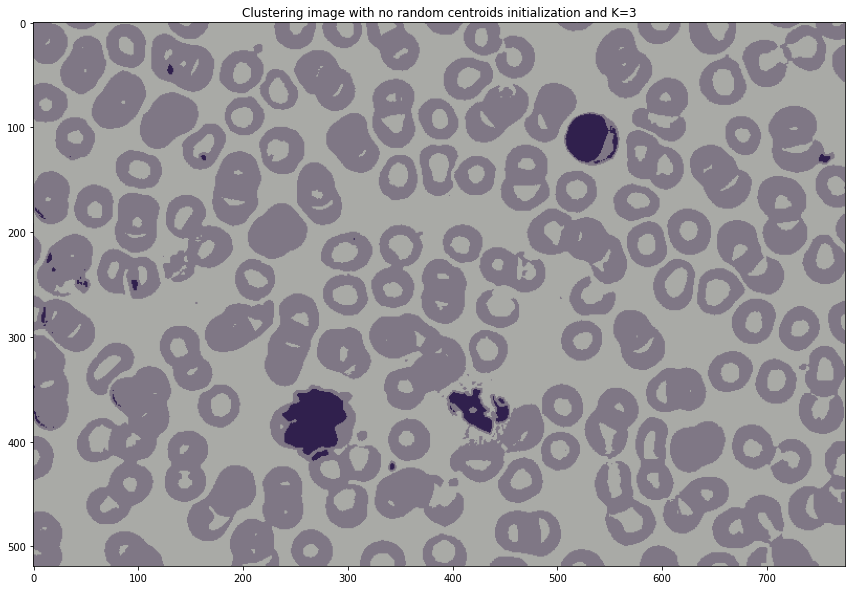

In [7]:
optimization_lstbis = []
lst_centroids = [np.array([np.array([142, 130, 140]), np.array([33, 10, 98]), np.array([172, 173, 165])]),
                 np.array([np.array([145, 133, 145]), np.array([174, 177, 170]), np.array([17, 16, 14])]),
                 np.array([np.array([33, 10, 98]), np.array([174, 177, 170]), np.array([17, 16, 14])])]
for k in lst_centroids:
    s, i = KMeans_centroids(img, 3, 5, k)
    optimization_lstbis.append((k, s, i))
    print(f"sum is {s}")

optimization_lstbis.sort(key=lambda y: y[1])
#print("Optimization list:", optimization_lstbis)

plt.figure(figsize=(16,10))
plt.title("Clustering image with no random centroids initialization and K=3")
plt.imshow(optimization_lstbis[0][2])
plt.show()

## Kmeans with sklearn and open-cv

In order to compare obtained results, we used Kmeans method already implemented in certain Python packages. The first is from open-cv, thus it's particularly useful for images. The second is from sklearn; it's normally used for machine learning, but it may also be used for image with the "shuffle" function.

### open-cv

In [12]:
import cv2

(402225, 3)


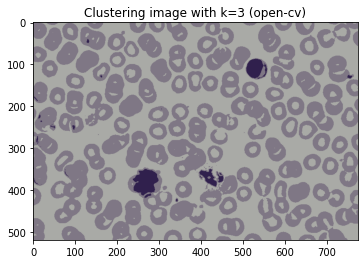

In [13]:
image = cv2.imread("imgs/blood.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

pixels_values = image.reshape((-1,3))

pixels_values = np.float32(pixels_values)

print(pixels_values.shape)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv2.kmeans(pixels_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.figure()
plt.title("Clustering image with k=3 (open-cv)")
plt.imshow(segmented_image)
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [9]:
imgbis=Image.open("imgs/blood.jpg")
imgbis_array = np.asarray(imgbis)/255

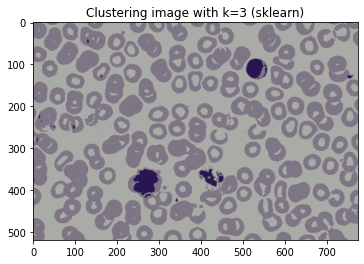

In [10]:
w, h, d = original_shape = tuple(imgbis_array.shape)
assert d == 3
imagebis_array = np.reshape(imgbis_array, (w * h, d))
imagebis_array_sample = shuffle(imagebis_array, random_state=4, n_samples=1_000)
kmeans = KMeans(n_clusters=3, random_state=4,max_iter=30).fit(imagebis_array_sample)
labels = kmeans.predict(imagebis_array)
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)
plt.figure()
plt.title("Clustering image with k=3 (sklearn)")
plt.imshow((recreate_image(kmeans.cluster_centers_, labels, w, h)))
plt.show()

# References
[1] LV Bijuraj. Clustering and its applications. In Proceedings of National Conference on New Horizons in IT-NCNHIT, page 169, 2013. <br>
[2] Clustering Paolo Ferragina Dipartimento di Informatica Università di Pisa.	http:// slideplayer.com/slide/8363774/. <br>
[3] Slides from lelec2885 Image Processing and Computer vision. Laurent Jacques. <br>
